In [4]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("UpdatedResumeDataSet.csv")

In [6]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [7]:
df.shape

(962, 2)

In [8]:
df.info

<bound method DataFrame.info of          Category                                             Resume
0    Data Science  Skills * Programming Languages: Python (pandas...
1    Data Science  Education Details \r\nMay 2013 to May 2017 B.E...
2    Data Science  Areas of Interest Deep Learning, Control Syste...
3    Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4    Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...
..            ...                                                ...
957       Testing  Computer Skills: â¢ Proficient in MS office (...
958       Testing  â Willingness to accept the challenges. â ...
959       Testing  PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...
960       Testing  COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961       Testing  Skill Set OS Windows XP/7/8/8.1/10 Database MY...

[962 rows x 2 columns]>

In [9]:
df.columns

Index(['Category', 'Resume'], dtype='object')

In [10]:
df.tail

<bound method NDFrame.tail of          Category                                             Resume
0    Data Science  Skills * Programming Languages: Python (pandas...
1    Data Science  Education Details \r\nMay 2013 to May 2017 B.E...
2    Data Science  Areas of Interest Deep Learning, Control Syste...
3    Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4    Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...
..            ...                                                ...
957       Testing  Computer Skills: â¢ Proficient in MS office (...
958       Testing  â Willingness to accept the challenges. â ...
959       Testing  PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...
960       Testing  COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961       Testing  Skill Set OS Windows XP/7/8/8.1/10 Database MY...

[962 rows x 2 columns]>

In [11]:
df.isnull().sum()

Category    0
Resume      0
dtype: int64

In [12]:
df["Category"].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

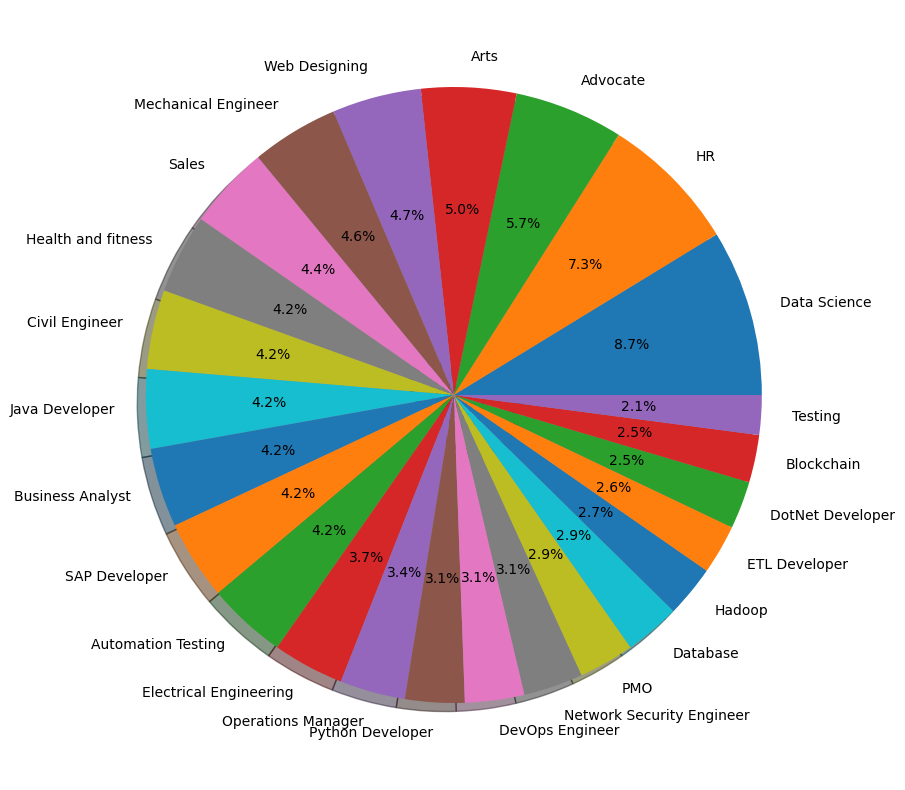

In [13]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()
plt.figure(figsize=(15,10))

plt.pie(counts,labels=labels,autopct='%1.1f%%',shadow=True)
plt.show()

In [16]:
df["Resume"][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

## Text cleaning

In [23]:
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
nltk.download("stopwords")
import string
import re
stopwords=stopwords.words("english")
stemmer=PorterStemmer()

[nltk_data] Downloading package stopwords to C:\Users\B MOHAN
[nltk_data]     RAO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [42]:
def text_cleaning(text):
    text=str(text).lower()
    text=re.sub("\[.*\]"," ",text)
    text=re.sub("https?://\s+www\.\s+"," ",text)
    text=re.sub("<.*?>+"," ",text)
    text=re.sub("[%s]" % re.escape(string.punctuation)," ",text)
    text=re.sub("\n"," ",text)
    text=re.sub("\w*\d\w*"," ",text)
    text=[I for I in text.split(" ") if I not in stopwords]
    text="".join(text)
    text=[stemmer.stem(text) for I in text.split(" ")]
    text=" ".join(text)
    return text

In [43]:
text_cleaning("my #### $ #  #noorsaeed webiste like is this http://heloword and access it @gmain.com")

'noorsaeedwebistelikehttphelowordaccessgmaincom'

In [44]:
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)  
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) 
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText

In [45]:
cleanResume("my #### $ #  #Anand webiste like is this http://heloword and access it @gmain.com")

'my webiste like is this and a ess it '

In [46]:
df["Resume"]=df["Resume"].apply(lambda x:cleanResume(x))

In [47]:
df["Resume"][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

In [48]:
# assigining labels to categories
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [49]:
df["category"]=enc.fit_transform(df["Category"])

In [51]:
df["category"].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

## Vectorization

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [53]:
vec=TfidfVectorizer()
arr=vec.fit_transform(df["Resume"])

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(arr,df["category"],test_size=0.25,random_state=43)

In [57]:
x_train.shape,x_test.shape

((721, 7566), (241, 7566))

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [59]:
ran_clf=RandomForestClassifier()

In [60]:
model=ran_clf.fit(x_train,y_train)

In [61]:
model.predict(x_test)

array([ 7,  7, 21, 15,  3, 22,  9, 18,  6, 24, 23, 12,  5, 13, 23, 19, 21,
       22, 12,  9,  7, 23, 23, 23, 18, 18, 23, 24, 21, 10,  1, 23, 23, 19,
        9, 20,  7,  1,  4,  9,  8, 16, 23, 18, 20,  2,  1,  2, 12, 19,  5,
        5,  1, 13, 20, 16,  2,  5, 16,  3, 16, 21,  6, 15, 24, 23,  3, 16,
       15, 15, 18,  6, 20, 20,  1, 15, 20,  8, 15,  4, 18, 20, 14,  7, 18,
       21, 18,  8, 22, 14,  1,  3, 14, 13, 11, 11,  9, 13,  3, 11, 18,  4,
       12, 18,  9, 18, 16, 15,  0, 11,  5, 14,  9, 23,  6, 13, 20, 18, 24,
        7,  8, 13,  3,  1,  5, 23,  6, 11,  8,  2, 18, 11, 23,  8, 15,  5,
        8,  2, 24, 23,  3, 24, 18, 23, 14,  6, 23, 20, 17, 17, 15, 11, 10,
       15, 15,  6, 14, 24, 15, 24,  0, 13,  7,  6,  0,  2,  7, 17, 18,  3,
        7, 20,  2, 15, 22, 10, 10, 10,  8, 11, 21, 12,  6,  4, 14,  2,  8,
       12, 18, 23, 15, 10, 24, 18, 18,  3, 23, 15, 17,  0,  8,  6, 15, 15,
       23, 21, 22,  8, 14, 20, 15, 14, 24, 22, 24, 15,  1, 12, 20, 15, 16,
       15, 17, 16, 23,  8

In [63]:
y_pred=model.predict(x_test)

In [65]:
print(accuracy_score(y_test,y_pred))

1.0


In [66]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(x_train,y_train)
ypred = clf.predict(x_test)
print(accuracy_score(y_test,ypred))

0.966804979253112


In [80]:
# loading the models
import pickle
pickle.dump(vec,open("vec.pkl","wb"))
pickle.dump(model,open("randomforest.pkl","wb"))
pickle.dump(clf,open("kNN.pkl","wb"))

In [68]:
myresume = """I am a data scientist specializing in machine
learning, deep learning, and computer vision. With
a strong background in mathematics, statistics,
and programming, I am passionate about
uncovering hidden patterns and insights in data.
I have extensive experience in developing
predictive models, implementing deep learning
algorithms, and designing computer vision
systems. My technical skills include proficiency in
Python, Sklearn, TensorFlow, and PyTorch.
What sets me apart is my ability to effectively
communicate complex concepts to diverse
audiences. I excel in translating technical insights
into actionable recommendations that drive
informed decision-making.
If you're looking for a dedicated and versatile data
scientist to collaborate on impactful projects, I am
eager to contribute my expertise. Let's harness the
power of data together to unlock new possibilities
and shape a better future.
Contact & Sources
Email: 611xyz@gmail.com
Phone: 03442826192
Github: https://github.com/611xyz
Linkdin: https://www.linkedin.com/in/xyz_654a23263/
Blogs: https://medium.com/@611xyz
Youtube: Artificial Intelligence
ABOUT ME
WORK EXPERIENCE
SKILLES
NOOR SAEED
LANGUAGES
English
Urdu
Hindi
I am a versatile data scientist with expertise in a wide
range of projects, including machine learning,
recommendation systems, deep learning, and computer
vision. Throughout my career, I have successfully
developed and deployed various machine learning models
to solve complex problems and drive data-driven
decision-making
Machine Learnine
Deep Learning
Computer Vision
Recommendation Systems
Data Visualization
Programming Languages (Python, SQL)
Data Preprocessing and Feature Engineering
Model Evaluation and Deployment
Statistical Analysis
Communication and Collaboration
"""

In [77]:
import pickle
model=pickle.load(open("randomforest.pkl","rb"))
vec=pickle.load(open("vec.pkl","rb"))
cleaned_text=cleanResume(myresume)
vec_text=vec.transform([myresume])
pred_id=model.predict(vec_text)[0] # to get only id value from the array

In [79]:
# now to get category with help of this id
category_mapping = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
}

cat_name=category_mapping.get(pred_id,"unknown")
print(cat_name)
print(pred_id)

Data Science
6


In [81]:
import joblib

In [82]:
from joblib import dump

In [83]:
dump(clf,"knnClassifier.joblib")

['knnClassifier.joblib']

In [ ]:
mo=load()